Introduction to Time Series Forecasting with Python by Jason Brownlee

Chapter 05
---
Basic Feature Engineering
---

Прежде чем мы сможем начать использовать алгоритмы машинного обучения, данные временных рядов должны быть преобразованы в набор данных supervised learning. 

Во временных рядах нет понятия входных и выходных признаков. 

Вместо этого мы должны выбрать переменную, которую нужно спрогнозировать, и использовать feature engineering для создания всех inputs данных, которые будут использоваться для прогнозирования будущих time steps.

После этой главы я буду знать:
---
+ Обоснование и цели feature engineering для  временных рядов 
+ Как разработать базовые date-time based input признаки
+ Как разработать более сложные лаговые и sliding window сводные статистические признаки

5.1 Feature Engineering for Time Series
---
+ Набор данных временных рядов необходимо преобразовать, чтобы его можно было смоделировать как задачу обучения с учителем.

Можно выделить **три** класса признаков, которые мы можем построить на основе нашего датасета:
+ Date Time Features: это компоненты самого временного шага для каждого наблюдения.
+ Lag Features: это значения на предыдущих временных шагах.
+ Window Features: это сводка значений в фиксированном окне предыдущих временных шагов

5.2 Цели конструирования признаков (Feature Engineering)
---

Цель Feature Engineering — **обеспечить прочные и идеально простые связи между новыми входными признаками и выходными признаками** для моделирования алгоритмом обучения с учителем. 

По сути, мы двигаемся по сложности (complexity). 
+ Complexity (сложность) существует во взаимоотношениях между входными и выходными данными. 

В случае временных рядов **нет понятия входных и выходных переменных**; 

Мы также должны изобрести их и сформулировать проблему контролируемого обучения с нуля. 

Мы можем положиться на способность сложных (sophisticated) моделей понять всю сложность (complexity) проблемы. 

Мы можем упростить работу с этими моделями (и даже использовать более простые модели), если сможем лучше выявить внутреннюю взаимосвязь между входными и выходными данными в данных.

Трудность заключается в том, что **мы не знаем основных функциональных отношений между входными и выходными данными, которые мы пытаемся раскрыть**. 


Если бы мы знали, нам, вероятно, не понадобилось бы машинное обучение. 

Вместо этого единственная обратная связь, которую мы имеем, — это **эффективность моделей, разработанных на основе наборов данных supervising learning**, или представления о проблеме, которую мы создаем. 

В действительности, лучшая стратегия по умолчанию — использовать все доступные знания для создания множества хороших наборов данных из вашего набора данных временных рядов и использовать model performance (и другие требования проекта), чтобы помочь определить, какие хорошие функции и хорошие представления о вашей проблеме оказываются.

5.3 Minimum Daily Temperatures Dataset
---
https://github.com/jbrownlee/Datasets/tree/master

Датасет содержит данные о минимальных дневных температурахза 10 лет (1981-1990) в Мельбурне, Австралия

In [90]:
file = 'datasets/daily-min-temperatures.csv'

5.4 Date Time Features
---

+  Загружаем датасет как Series
+ создаем датафрейм, в который помещаем данные из Series

In [91]:
import pandas as pd

series = pd.read_csv(file, header=0, index_col=0,
                    parse_dates=True).squeeze()

print(type(series))
series.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [92]:
# к элементам series удобно обращаться по индексу
series['1981-01-01']

20.7

In [93]:
series.shape[0]

3650

In [94]:
len(series)

3650

In [95]:
series.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [96]:
series.index[1]

Timestamp('1981-01-02 00:00:00')

In [97]:
series.index[1].month

1

In [98]:
# создаем датафрейм
dataframe = pd.DataFrame()
dataframe

""


In [99]:
# создаем столбец с номером месяца
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe

,month
0,1
1,1
2,1
3,1
4,1
...,...
3645,12
3646,12
3647,12
3648,12


In [100]:
# создаем столбец, в который помещаем номер дня
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe

,month,day
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
3645,12,27
3646,12,28
3647,12,29
3648,12,30


In [101]:
# создаем столбец, в который помещаем значения темпереатуры
dataframe['temperature'] = [series.iloc[i] for i in range(len(series))]
dataframe

,month,day,temperature
0,1,1,20.7
1,1,2,17.9
2,1,3,18.8
3,1,4,14.6
4,1,5,15.8
...,...,...,...
3645,12,27,14.0
3646,12,28,13.6
3647,12,29,13.5
3648,12,30,15.7


Мы можем перечислить все свойства time-stamp и рассмотреть их как потенциально полезные для нашей задачи:
+ Minutes elapsed for the day: количество прошедших минут
+ Hour of day.
+ Business hours or not.
+ Weekend or not.
+  Season of the year.
+  Business quarter of the year.
+  Daylight savings or not.
+  Public holiday or not.
+  Leap year or not.

5.5 Lag Features
---
+ `shift()`

In [102]:
dataframe['Lag 1'] = dataframe['temperature'].shift(1)
dataframe

,month,day,temperature,Lag 1
0,1,1,20.7,NaN
1,1,2,17.9,20.7
2,1,3,18.8,17.9
3,1,4,14.6,18.8
4,1,5,15.8,14.6
...,...,...,...,...
3645,12,27,14.0,14.6
3646,12,28,13.6,14.0
3647,12,29,13.5,13.6
3648,12,30,15.7,13.5


+ Как видите, нам придется отбросить первую строку, чтобы использовать набор данных для обучения моделипоскольку он не содержит достаточного количества данных для работы (есть Nan).

+ Добавление запаздывающих признаков (лагов) называется методом скользящего окна (**sliding window method**), в данном случае с шириной окна, равной 1. 
+ Это как если бы мы перемещали фокус по временному ряду для каждого наблюдения, интересуясь только тем, что находится в пределах ширины окна. 
+ Мы можем расширить ширину окна и включить больше лаггированных признаков. 

In [103]:
series = pd.read_csv(file, header=0, index_col=0, 
                    parse_dates=True).squeeze()
df = pd.DataFrame()
df['t'] = [series.iloc[i] for i in range(len(series))]
df.head()

,t
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [104]:
df['Lag 1'] = df['t'].shift(1)
df.head()

,t,Lag 1
0,20.7,NaN
1,17.9,20.7
2,18.8,17.9
3,14.6,18.8
4,15.8,14.6


In [105]:
temps = pd.DataFrame(series.values)
temps.head()

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [106]:
df2 = pd.concat([temps.shift(1), temps], axis=1)
df2.columns = ['t', 't+1']
df2.head()

,t,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


In [107]:
series = pd.read_csv(file, header=0, index_col=0, 
                    parse_dates=True).squeeze()
df = pd.DataFrame()
df['t'] = [series.iloc[i] for i in range(len(series))]
for lag in range(1,4):
    df[f'Lag_{lag}'] = df['t'].shift(lag)
df.head()

,t,Lag_1,Lag_2,Lag_3
0,20.7,NaN,NaN,NaN
1,17.9,20.7,NaN,NaN
2,18.8,17.9,20.7,NaN
3,14.6,18.8,17.9,20.7
4,15.8,14.6,18.8,17.9


+ Вы можете видеть, что мы должны отбросить первые несколько строк, в которых недостаточно данных (есть NaN).
+ Трудность при использовании метода скользящего окна заключается в том, насколько велико окно для решения вашей проблемы. 
+ Возможно, хорошей отправной точкой будет выполнить анализ чувствительности и попробовать набор окон различной ширины, чтобы, в свою очередь, создать набор различных представлений вашего набора данных и посмотреть, какие из них приводят к более эффективной работе моделей. 

+ Кроме того, зачем останавливаться на линейном окне? 
+ Возможно, вам нужно лаговое значение за прошлую неделю, последний месяц и прошлый год. Это зависит от специфики предметной области
+ В случае набора температурных данных может оказаться полезным лагированные значения с того же дня в предыдущем году или в предыдущие несколько лет. 
+ С окном мы можем сделать больше, чем просто включить необработанные значения.

5.6 Rolling Window Statistics
---
+ Скользщие статистики: скользящее среднее и т.д.
+ `rolling()`  - создает скользящее окно
+ рассчитываем статистику по этому скользящему окну

`rolling` нужно применять вместе с лаггированием!

In [108]:
series = pd.read_csv(file, header=0, index_col=0, 
                    parse_dates=True).squeeze()
df = pd.DataFrame()
df['t'] = [series.iloc[i] for i in range(len(series))]
df.head()

,t
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [109]:
series = pd.read_csv(file, header=0, index_col=0, 
                    parse_dates=True).squeeze()
temps = pd.DataFrame(series.values)
display("temps", temps.head())



width = 3
shifted = temps.shift(width - 1)
display('shifted', shifted.head())

window = shifted.rolling(window=width)
display('window', window)

'temps'

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


'shifted'

,0
0,NaN
1,NaN
2,20.7
3,17.9
4,18.8


'window'

Rolling [window=3,center=False,axis=0,method=single]

In [110]:
dataframe = pd.concat([window.min(), window.mean(), 
                       window.max(), temps],
                     axis=1)
dataframe.columns = ['min', 'mean', 'max', 't']

dataframe.head(10)

,min,mean,max,t
0,NaN,NaN,NaN,20.7
1,NaN,NaN,NaN,17.9
2,NaN,NaN,NaN,18.8
3,NaN,NaN,NaN,14.6
4,17.9,19.133333,20.7,15.8
5,14.6,17.100000,18.8,15.8
6,14.6,16.400000,18.8,15.8
7,14.6,15.400000,15.8,17.4
8,15.8,15.800000,15.8,21.8
9,15.8,16.333333,17.4,20.0


In [111]:
series = pd.read_csv(file, header=0, index_col=0, 
                    parse_dates=True).squeeze()
df = pd.DataFrame()
df['t'] = [series.iloc[i] for i in range(len(series))]
df.head()

,t
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [112]:
lag = 2
width = 3
df['MA_min'] = df['t'].shift(lag).rolling(width).min()
df['MA_mean'] = df['t'].shift(lag).rolling(width).mean()
df['MA_max'] = df['t'].shift(lag).rolling(width).max()
df.head(10)

,t,MA_min,MA_mean,MA_max
0,20.7,NaN,NaN,NaN
1,17.9,NaN,NaN,NaN
2,18.8,NaN,NaN,NaN
3,14.6,NaN,NaN,NaN
4,15.8,17.9,19.133333,20.7
5,15.8,14.6,17.100000,18.8
6,15.8,14.6,16.400000,18.8
7,17.4,14.6,15.400000,15.8
8,21.8,15.8,15.800000,15.8
9,20.0,15.8,16.333333,17.4


5.7 Expanding Window Statistics
---
+ Другой тип окна, который может быть полезен, включает все предыдущие данные в серии. 
+ Это называется расширяющимся окном (**expanding window**) и может помочь отслеживать границы наблюдаемых данных. 
+ Как и функция **rolling()** в DataFrame, Pandas предоставляет функцию **expanding()**, которая собирает все предыдущие значения для каждого time-step. 

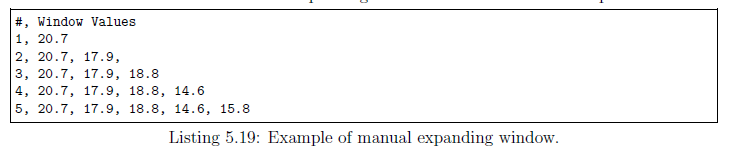

Мы должны применить лаг (**shift**) для того чтобы убрать значение, которое мы хотим спрогнозировать (утечеку устранить).

Т.е. входно окно значений будет выглядеть следующим образом:

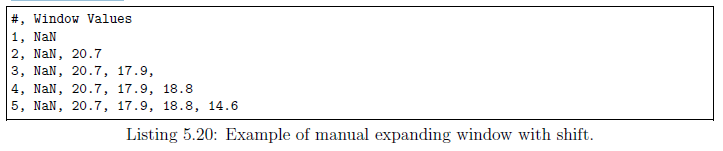

In [115]:
series = pd.read_csv(file, header=0, index_col=0, 
                    parse_dates=True).squeeze()
temps = pd.DataFrame(series.values)
window = temps.expanding()

display('window', print(window))

Expanding [min_periods=1,axis=0,method=single]


'window'

None

In [117]:
dataframe = pd.concat([window.min(), 
                      window.mean(),
                      window.max(), 
                       temps,
                      temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't', 't+1']
dataframe.head()

,min,mean,max,t,t+1
0,20.7,20.700000,20.7,20.7,17.9
1,17.9,19.300000,20.7,17.9,18.8
2,17.9,19.133333,20.7,18.8,14.6
3,14.6,18.000000,20.7,14.6,15.8
4,14.6,17.560000,20.7,15.8,15.8


In [120]:
series = pd.read_csv(file, header=0, index_col=0, 
                    parse_dates=True).squeeze()
df = pd.DataFrame([series.iloc[i] for i in range(len(series))])
df.columns = ['t']
df.head()

,t
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [126]:
df['min'] = df['t'].expanding().min()
df['mean'] = df['t'].expanding().mean()
df['max'] = df['t'].expanding().max()
df.head()

,t,min,mean,max
0,20.7,20.7,20.700000,20.7
1,17.9,17.9,19.300000,20.7
2,18.8,17.9,19.133333,20.7
3,14.6,14.6,18.000000,20.7
4,15.8,14.6,17.560000,20.7
